### Machine Learning and Contect Analytics

MSc in Business Analytics

Department of Managment Science & Technology

Athens University of Economics and Business

#### Authors
* Alvanou Marianna, ΑΜ: p2822201
* Vlachakis Sotirios, ΑΜ: p2822228

# Data Cleaning in Survey's File

In [1]:
import pandas as pd

In [2]:
Data = pd.read_excel("Downloads\\Surveys.xlsx")

In [3]:
Data

,Brand,Comments
0,8.0,NaN
1,10.0,NaN
2,NaN,NaN
3,10.0,NaN
4,8.0,NaN
...,...,...
26060,10.0,ΕΞΥΠΗΡΕΤΗΣΗ
26061,8.0,EΞYΠHPETHΣH
26062,NaN,NaN
26063,0.0,NaN


In [4]:
Data[Data['Comments'].isna()]

,Brand,Comments
0,8.0,NaN
1,10.0,NaN
2,NaN,NaN
3,10.0,NaN
4,8.0,NaN
...,...,...
26055,10.0,NaN
26056,10.0,NaN
26058,NaN,NaN
26062,NaN,NaN


In [5]:
Data=Data.dropna(subset=['Comments'])

In [6]:
def binary_survey(survey):
        if survey > 8:
            return 'Positive'
        elif survey > 6 and survey <= 8:
            return 'Neutral'
        else:
            return 'Negative'

In [7]:
# Net Promoter Score
   
Data['NPS_Label'] = Data['Brand'].apply(binary_survey)

C:\Users\mario\AppData\Local\Temp\ipykernel_2880\3301438372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['NPS_Label'] = Data['Brand'].apply(binary_survey)


In [8]:
Data

,Brand,Comments,NPS_Label
10,10.0,AMEΣH EΠIKOINΩNIA. APIΣTH EΞYΠHPETHΣH AΠO TON ...,Positive
11,10.0,ΓPHΓOPH KAI AΠOTEΛEΣMATIKH EΞYΠHPETHΣH,Positive
12,10.0,THN AMEΣH EΞYΠHPETHΣH ΠOY EIXA ΣTO ΠPOBΛHMA MOY,Positive
15,10.0,AΠOTEΛEΣMA AMEΣO ΣTO AITHMA MOY ΠOΛY EYΓENIKH ...,Positive
16,10.0,AMEΣH KAI AΠOTEΛEΣMATIKH ANTIMETΩΠIΣH TOY ΠPOB...,Positive
...,...,...,...
26057,NaN,13553,Negative
26059,9.0,H OPΓANΩΣH KAI H AMEΣH EΞYΠHPETHΣH,Positive
26060,10.0,ΕΞΥΠΗΡΕΤΗΣΗ,Positive
26061,8.0,EΞYΠHPETHΣH,Neutral


In [9]:
Data.isna().sum()

Brand        523
Comments       0
NPS_Label      0
dtype: int64

In [10]:
Data=Data.dropna(subset=['Brand'])

In [11]:
Data

,Brand,Comments,NPS_Label
10,10.0,AMEΣH EΠIKOINΩNIA. APIΣTH EΞYΠHPETHΣH AΠO TON ...,Positive
11,10.0,ΓPHΓOPH KAI AΠOTEΛEΣMATIKH EΞYΠHPETHΣH,Positive
12,10.0,THN AMEΣH EΞYΠHPETHΣH ΠOY EIXA ΣTO ΠPOBΛHMA MOY,Positive
15,10.0,AΠOTEΛEΣMA AMEΣO ΣTO AITHMA MOY ΠOΛY EYΓENIKH ...,Positive
16,10.0,AMEΣH KAI AΠOTEΛEΣMATIKH ANTIMETΩΠIΣH TOY ΠPOB...,Positive
...,...,...,...
26053,10.0,EΞYΠHPETHΣH AMEΣA..,Positive
26059,9.0,H OPΓANΩΣH KAI H AMEΣH EΞYΠHPETHΣH,Positive
26060,10.0,ΕΞΥΠΗΡΕΤΗΣΗ,Positive
26061,8.0,EΞYΠHPETHΣH,Neutral


In [12]:
Data.dtypes

Brand        float64
Comments      object
NPS_Label     object
dtype: object

In [13]:
#Change type

Data['Brand'] = Data['Brand'].astype('int64')
Data['Comments'] = Data['Comments'].astype(str)

C:\Users\mario\AppData\Local\Temp\ipykernel_2880\3722676440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Brand'] = Data['Brand'].astype('int64')
C:\Users\mario\AppData\Local\Temp\ipykernel_2880\3722676440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Comments'] = Data['Comments'].astype(str)


In [14]:
Data.dtypes

Brand         int64
Comments     object
NPS_Label    object
dtype: object

* We need to drop from 'Comments' column those that are numbers or symbols 

In [15]:
# Define a regular expression pattern to match numbers or symbols
pattern = r'^[0-9\W]+$'

# Drop rows where the column contains only numbers or symbols
Surveys = Data[~Data['Comments'].str.contains(pattern)]

In [16]:
Surveys

,Brand,Comments,NPS_Label
10,10,AMEΣH EΠIKOINΩNIA. APIΣTH EΞYΠHPETHΣH AΠO TON ...,Positive
11,10,ΓPHΓOPH KAI AΠOTEΛEΣMATIKH EΞYΠHPETHΣH,Positive
12,10,THN AMEΣH EΞYΠHPETHΣH ΠOY EIXA ΣTO ΠPOBΛHMA MOY,Positive
15,10,AΠOTEΛEΣMA AMEΣO ΣTO AITHMA MOY ΠOΛY EYΓENIKH ...,Positive
16,10,AMEΣH KAI AΠOTEΛEΣMATIKH ANTIMETΩΠIΣH TOY ΠPOB...,Positive
...,...,...,...
26053,10,EΞYΠHPETHΣH AMEΣA..,Positive
26059,9,H OPΓANΩΣH KAI H AMEΣH EΞYΠHPETHΣH,Positive
26060,10,ΕΞΥΠΗΡΕΤΗΣΗ,Positive
26061,8,EΞYΠHPETHΣH,Neutral


In [17]:
Surveys['Comments']

10       AMEΣH EΠIKOINΩNIA. APIΣTH EΞYΠHPETHΣH AΠO TON ...
11                  ΓPHΓOPH KAI AΠOTEΛEΣMATIKH EΞYΠHPETHΣH
12         THN AMEΣH EΞYΠHPETHΣH ΠOY EIXA ΣTO ΠPOBΛHMA MOY
15       AΠOTEΛEΣMA AMEΣO ΣTO AITHMA MOY ΠOΛY EYΓENIKH ...
16       AMEΣH KAI AΠOTEΛEΣMATIKH ANTIMETΩΠIΣH TOY ΠPOB...
                               ...                        
26053                                  EΞYΠHPETHΣH AMEΣA..
26059                   H OPΓANΩΣH KAI H AMEΣH EΞYΠHPETHΣH
26060                                          ΕΞΥΠΗΡΕΤΗΣΗ
26061                                          EΞYΠHPETHΣH
26064       EYΓENIA KAI AMEΣH EΞYΠHPETHΣH TΩN EKΠPOΣΩΠΩN!!
Name: Comments, Length: 14927, dtype: object

In [18]:
print(Surveys['Comments'].iloc[111])

ΓPHΓOPH EΞYΠHPETHΣH. ΘA HΘEΛA OMΩΣ NA ME KAΛEI MONO O ΠPOΣΩΠIKOΣ ΣYMBOYΛOΣ H TO KATAΣTHMA KOPINΘOY ΓIA NEA ΠPOΓPAMMATA OXI AΠO AΣXETA KATAΣTHMATA. THN TEΛEYTAIA ΦOPA ΠOY ANANEΩΣA TO ΠPOΓPAMMA ΔEN EMEINA EYXAPIΣTHMENH.


In [19]:
#Check for n/a

Surveys.isna().sum()

Brand        0
Comments     0
NPS_Label    0
dtype: int64

* Change the Font of Comments

In [20]:
def to_greek_lowercase(s):

    # Extended mapping to include visually similar English characters

    greek_mapping = {

        'A': 'α', 'Α': 'α', 'B': 'β', 'Β': 'β', 'Γ': 'γ', 'Δ': 'δ', 'E': 'ε', 'Ε': 'ε',

        'H': 'η', 'Η': 'η', 'I': 'ι', 'Ι': 'ι', 'K': 'κ', 'Κ': 'κ',

        'M': 'μ', 'Μ': 'μ', 'N': 'ν', 'Ν': 'ν', 'O': 'ο', 'Ο': 'ο',

        'T': 'τ', 'Τ': 'τ', 'X': 'χ', 'Χ': 'χ', 'Y': 'υ', 'Υ': 'υ',

        'Z': 'ζ', 'Ζ': 'ζ', 'Θ': 'θ', 'Λ': 'λ', 'l':'λ',

        'Ξ': 'ξ', 'Π': 'π', 'Ρ': 'ρ', 'P': 'ρ', 'Σ': 'σ', 'Φ': 'φ', 'Ψ': 'ψ', 'Ω': 'ω'

    }

 

    # Use the dictionary to replace characters

    return ''.join(greek_mapping.get(c, c) for c in s)

In [21]:
Surveys['Comments'] = Surveys['Comments'].apply(to_greek_lowercase)

C:\Users\mario\AppData\Local\Temp\ipykernel_2880\1779352832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Surveys['Comments'] = Surveys['Comments'].apply(to_greek_lowercase)


In [22]:
Surveys.head(10)

,Brand,Comments,NPS_Label
10,10,αμεση επικοινωνια. αριστη εξυπηρετηση απο τον ...,Positive
11,10,γρηγορη και αποτελεσματικη εξυπηρετηση,Positive
12,10,την αμεση εξυπηρετηση που ειχα στο προβλημα μου,Positive
15,10,αποτελεσμα αμεσο στο αιτημα μου πολυ ευγενικη ...,Positive
16,10,αμεση και αποτελεσματικη αντιμετωπιση του προβ...,Positive
18,9,αψογη εξυπηρετηση,Positive
28,9,"επανειλημμενα προβληματα με το router, εξυπηρ...",Positive
29,10,γρηγορη εξυπηρετηση,Positive
46,9,αλλ ok.,Positive
55,10,αμεση εξυπηρετηση και επιλυση προβληματοσ.,Positive


### Data Analysis

##### Univariate Analysis

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

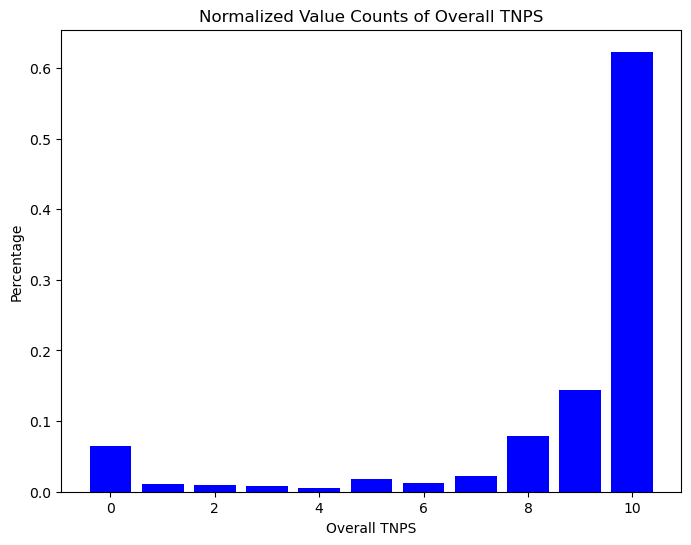

In [24]:
# Calculate the normalized value counts
normalized_counts = Surveys['Brand'].value_counts(normalize=True)

# Create the Bar plot
plt.figure(figsize=(8, 6))
plt.bar(normalized_counts.index, normalized_counts.values, color='blue')

plt.xlabel('Overall TNPS')
plt.ylabel('Percentage')
plt.title('Normalized Value Counts of Overall TNPS')
plt.show()

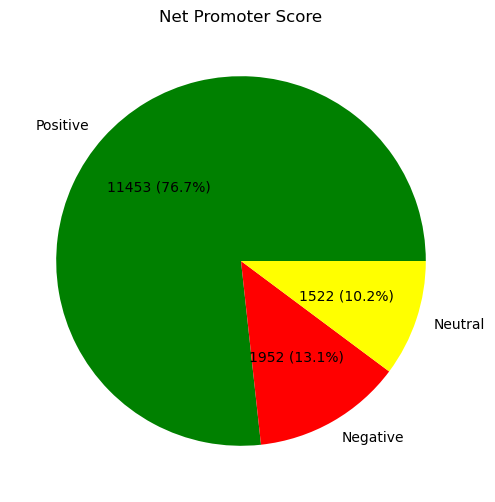

In [25]:
import matplotlib.pyplot as plt

# Calculate the value counts for each category
value_counts = Surveys['NPS_Label'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, 
        autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(value_counts) / 100, p), 
        colors=['green', 'red', 'yellow']
       )
plt.title('Net Promoter Score')
plt.show()


In [27]:
# export excel
Surveys.to_excel(r'Downloads\\data_cleaning.xlsx')

##### Draw word Cloud (with stopwords)

In [28]:
pip install wordcloud

In [29]:
gr_stop = [ ',', 'αν', 'απο', 'από', 'ας', 'αυτο', 'για', 'εγω', 'εσυ', 'ετσι', 'ειμαι', 'ειναι',
           'ειχα', 'ενα', 'εχει', 'εχω', 'η', 'ηταν', 'θα', 'η', 'η', 'ηταν', 'θα', 'και', 'και',
           'κι', 'μα', 'μας', 'με', 'μες', 'μη', 'μην', 'μια', 'μου', 'μου,', 'μ’', 'ν', 'να', 'ο',
           'ο', 'οι', 'ολα', 'οτι','που', 'σασ', 'σε', 'στην', 'στο', 'τα','τη', 'την', 'τησ', 'τισ',
           'το', 'τον', 'του', 'τουσ', 'των']

Positive words


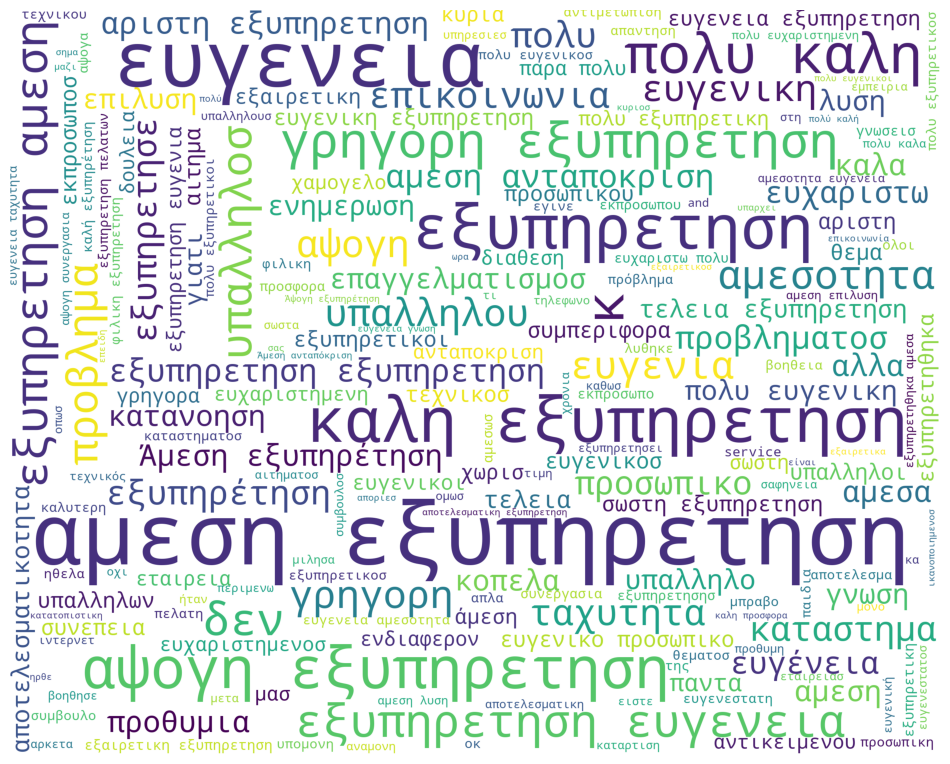

Negative words


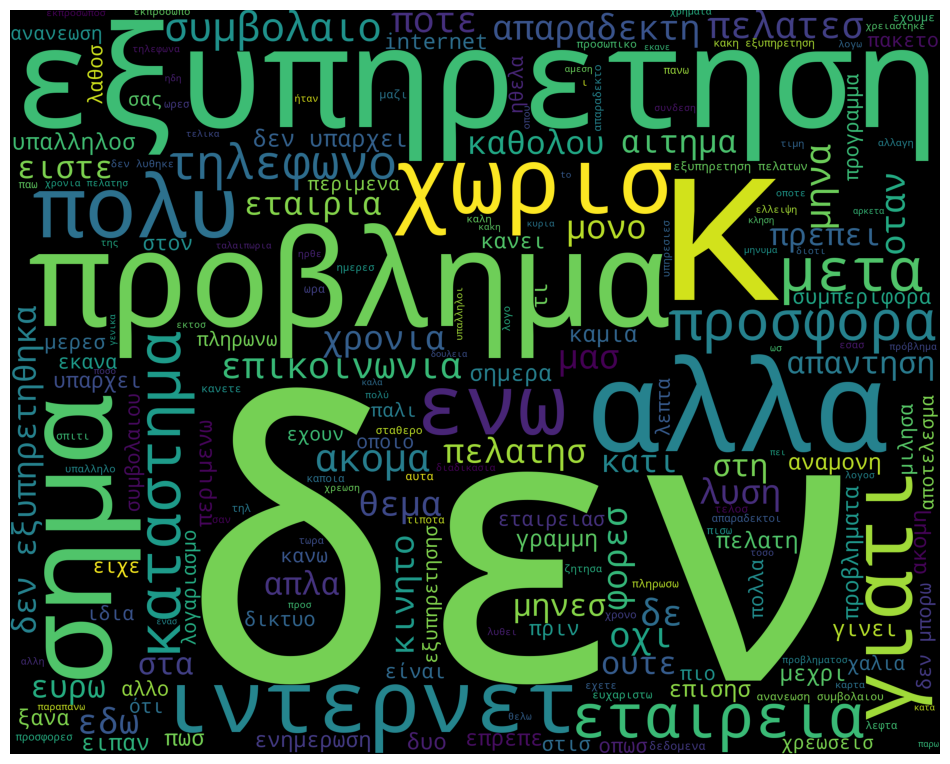

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


# Splitting the dataset into train and test set
train, test = train_test_split(Surveys,test_size = 0.1)

train_pos = train[ train['NPS_Label'] == 'Positive']
train_pos = train_pos['Comments']
#train_neu = train[ train['NPS_Label'] == 'Neutral']
#train_neu = train_neu['Comments']
train_neg = train[ train['NPS_Label'] == 'Negative']
train_neg = train_neg['Comments']


def wordcloud_draw(Surveys, color = 'black'):
    words = ' '.join(Surveys)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords = gr_stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
#print("Neutral words")
#wordcloud_draw(train_neu,'gray')
print("Negative words")
wordcloud_draw(train_neg)